In [85]:
# Sample input
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import seaborn as sns
import numpy as np


In [105]:
df = pd.read_json("images.json")

In [106]:
df

,name,path,week,page
0,week_01_page_001.png,.\data\imgs\week_01\week_01_page_001.png,1,1
1,week_01_page_002.png,.\data\imgs\week_01\week_01_page_002.png,1,2
2,week_01_page_003.png,.\data\imgs\week_01\week_01_page_003.png,1,3
3,week_01_page_004.png,.\data\imgs\week_01\week_01_page_004.png,1,4
4,week_01_page_005.png,.\data\imgs\week_01\week_01_page_005.png,1,5
...,...,...,...,...
880,week_16_page_008.png,.\data\imgs\week_16\week_16_page_008.png,16,8
881,week_16_page_009.png,.\data\imgs\week_16\week_16_page_009.png,16,9
882,week_16_page_010.png,.\data\imgs\week_16\week_16_page_010.png,16,10
883,week_16_page_011.png,.\data\imgs\week_16\week_16_page_011.png,16,11


In [107]:
df_tra = pd.read_json("transcript.json")

df_tra

,transcript,week,page
0,As you guys have probably already noticed that...,1,1
1,"And let me quickly talk about my research. So,...",1,2
2,"Let's see some of examples. So, first, right i...",1,3
3,And I will introduce one more of the previous ...,1,4
4,"And also, this is about another application in...",1,5
...,...,...,...
880,"So, we can apply for two kinds of jobs after s...",16,8
881,"For example, related to some machine learning ...",16,9
882,"So, let's say, some example job descriptions. ...",16,10
883,Next about your final project. We want to quic...,16,11


In [108]:
new_df = pd.merge(df, df_tra, on=['week', 'page'])
new_df

,name,path,week,page,transcript
0,week_01_page_001.png,.\data\imgs\week_01\week_01_page_001.png,1,1,As you guys have probably already noticed that...
1,week_01_page_002.png,.\data\imgs\week_01\week_01_page_002.png,1,2,"And let me quickly talk about my research. So,..."
2,week_01_page_003.png,.\data\imgs\week_01\week_01_page_003.png,1,3,"Let's see some of examples. So, first, right i..."
3,week_01_page_004.png,.\data\imgs\week_01\week_01_page_004.png,1,4,And I will introduce one more of the previous ...
4,week_01_page_005.png,.\data\imgs\week_01\week_01_page_005.png,1,5,"And also, this is about another application in..."
...,...,...,...,...,...
880,week_16_page_008.png,.\data\imgs\week_16\week_16_page_008.png,16,8,"So, we can apply for two kinds of jobs after s..."
881,week_16_page_009.png,.\data\imgs\week_16\week_16_page_009.png,16,9,"For example, related to some machine learning ..."
882,week_16_page_010.png,.\data\imgs\week_16\week_16_page_010.png,16,10,"So, let's say, some example job descriptions. ..."
883,week_16_page_011.png,.\data\imgs\week_16\week_16_page_011.png,16,11,Next about your final project. We want to quic...


In [109]:
df_qa = pd.read_json("qa.json")

df_qa

,instruction,context,response,category,week,page
0,Can you explain this slide?,AIM 5005 Machine Learning slide,The slide introduces AIM 5005 Machine Learning...,summarization,1,1
1,Who is the instructor for this course?,AIM 5005 Machine Learning slide,The instructor is Dr. Youshan Zhang.,information_extraction,1,1
2,What is the course code?,AIM 5005 Machine Learning slide,The course code is AIM 5005.,information_extraction,1,1
3,What is the focus of Lecture 1?,AIM 5005 Machine Learning slide,Lecture 1 focuses on an introduction to machin...,closed_qa,1,1
4,What is the date of the lecture?,AIM 5005 Machine Learning slide,The lecture date is 01/18/2023.,information_extraction,1,1
...,...,...,...,...,...,...
9411,Can you explain this slide?,A slide titled 'Questions' with an image of a ...,The slide titled 'Questions' showcases an imag...,summarization,16,12
9412,What is the primary focus of the slide?,A slide titled 'Questions' with an image of a ...,"The primary focus of the slide is 'Questions',...",classification,16,12
9413,What might be the purpose of this slide in a p...,A slide titled 'Questions' with an image of a ...,The slide might be used to prompt audience int...,general_qa,16,12
9414,What emotions might this slide evoke in an aud...,A slide titled 'Questions' with an image of a ...,"The slide might evoke curiosity, anticipation,...",creative_writing,16,12


In [110]:
new_df

,name,path,week,page,transcript
0,week_01_page_001.png,.\data\imgs\week_01\week_01_page_001.png,1,1,As you guys have probably already noticed that...
1,week_01_page_002.png,.\data\imgs\week_01\week_01_page_002.png,1,2,"And let me quickly talk about my research. So,..."
2,week_01_page_003.png,.\data\imgs\week_01\week_01_page_003.png,1,3,"Let's see some of examples. So, first, right i..."
3,week_01_page_004.png,.\data\imgs\week_01\week_01_page_004.png,1,4,And I will introduce one more of the previous ...
4,week_01_page_005.png,.\data\imgs\week_01\week_01_page_005.png,1,5,"And also, this is about another application in..."
...,...,...,...,...,...
880,week_16_page_008.png,.\data\imgs\week_16\week_16_page_008.png,16,8,"So, we can apply for two kinds of jobs after s..."
881,week_16_page_009.png,.\data\imgs\week_16\week_16_page_009.png,16,9,"For example, related to some machine learning ..."
882,week_16_page_010.png,.\data\imgs\week_16\week_16_page_010.png,16,10,"So, let's say, some example job descriptions. ..."
883,week_16_page_011.png,.\data\imgs\week_16\week_16_page_011.png,16,11,Next about your final project. We want to quic...


In [113]:
final_df = pd.merge(df_qa, new_df, on=['week', 'page'])
final_df.head(5)

,instruction,context,response,category,week,page,name,path,transcript
0,Can you explain this slide?,AIM 5005 Machine Learning slide,The slide introduces AIM 5005 Machine Learning...,summarization,1,1,week_01_page_001.png,.\data\imgs\week_01\week_01_page_001.png,As you guys have probably already noticed that...
1,Who is the instructor for this course?,AIM 5005 Machine Learning slide,The instructor is Dr. Youshan Zhang.,information_extraction,1,1,week_01_page_001.png,.\data\imgs\week_01\week_01_page_001.png,As you guys have probably already noticed that...
2,What is the course code?,AIM 5005 Machine Learning slide,The course code is AIM 5005.,information_extraction,1,1,week_01_page_001.png,.\data\imgs\week_01\week_01_page_001.png,As you guys have probably already noticed that...
3,What is the focus of Lecture 1?,AIM 5005 Machine Learning slide,Lecture 1 focuses on an introduction to machin...,closed_qa,1,1,week_01_page_001.png,.\data\imgs\week_01\week_01_page_001.png,As you guys have probably already noticed that...
4,What is the date of the lecture?,AIM 5005 Machine Learning slide,The lecture date is 01/18/2023.,information_extraction,1,1,week_01_page_001.png,.\data\imgs\week_01\week_01_page_001.png,As you guys have probably already noticed that...


In [137]:
final_df.shape

(9416, 9)

In [138]:
final_df['instruction'] = final_df['instruction'].str.replace("Can you explain this slide?", "Can you summarise this slide?")


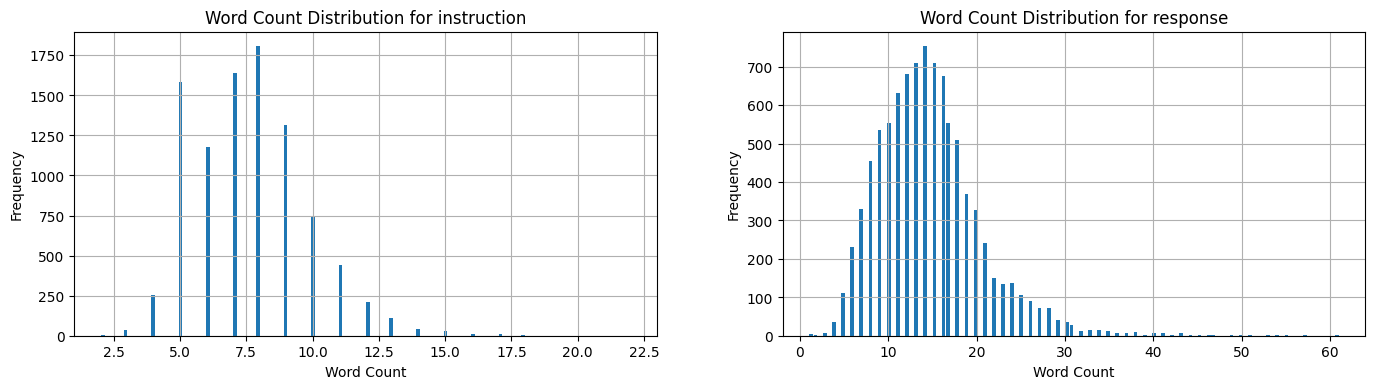

In [90]:
# Columns of interest
columns_of_interest = ['instruction', 'response']

# Function to count words in a string
def count_words(s):
    return len(str(s).split())

# Applying the function to columns of interest
for column in columns_of_interest:
    df_qa[column + '_word_count'] = df_qa[column].apply(count_words)

# Visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.tight_layout(pad=6)

for index, column in enumerate(columns_of_interest):
    ax = axes[index]
    df_qa[column + '_word_count'].hist(ax=ax, bins=116, rwidth=0.8)
    ax.set_title(f'Word Count Distribution for {column}')
    ax.set_xlabel('Word Count')
    ax.set_ylabel('Frequency')

plt.show()

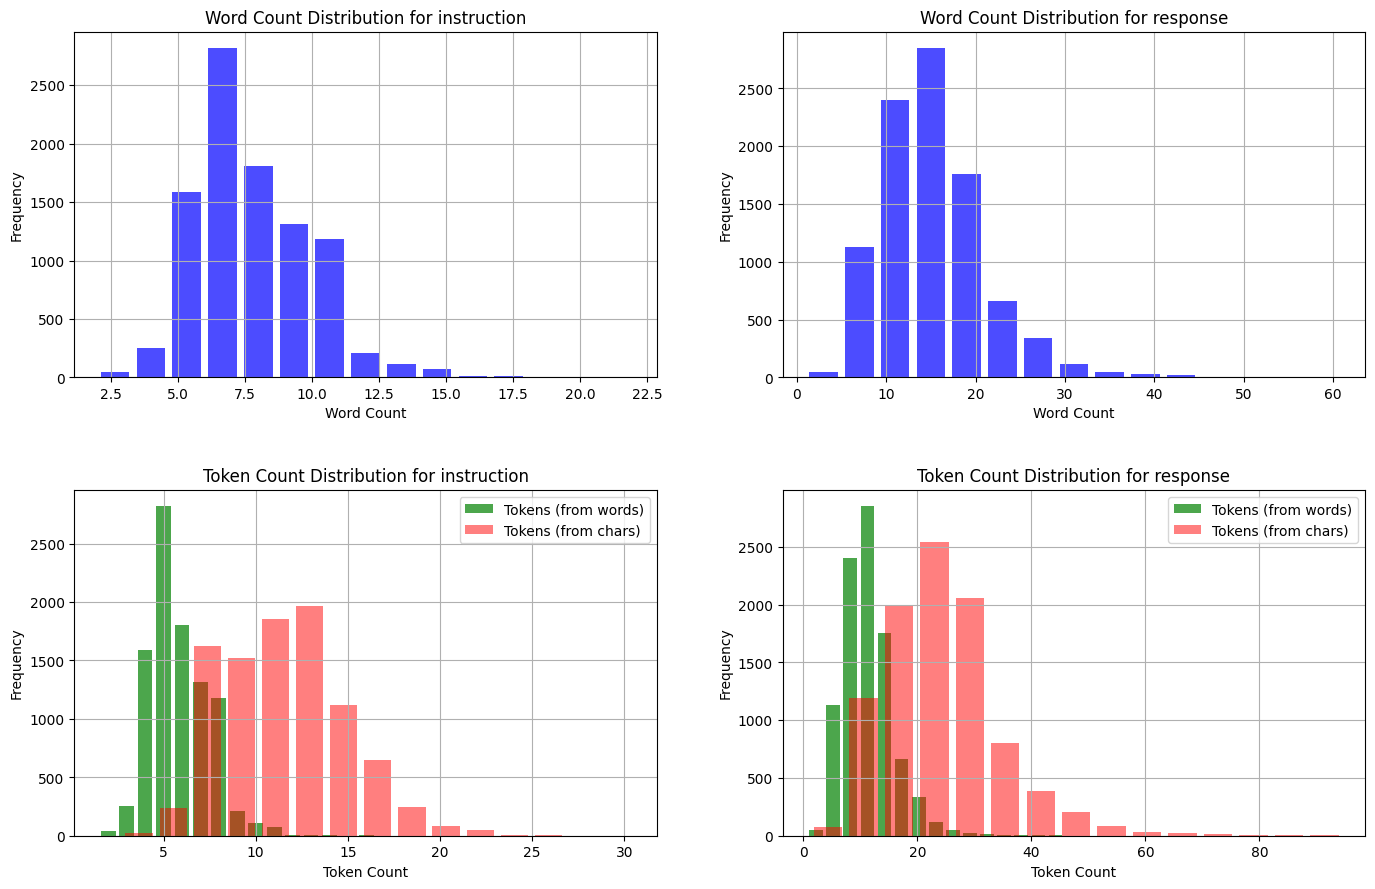

In [91]:
# Columns of interest
columns_of_interest = ['instruction', 'response']

# Function to count words in a string
def count_words(s):
    return len(str(s).split())

# Function to count tokens based on character count
def count_tokens_from_chars(s):
    return len(s) / 4

# Function to count tokens based on word count
def count_tokens_from_words(word_count):
    return 3/4 * word_count

# Counting words and tokens for columns of interest
for column in columns_of_interest:
    word_count_col = column + '_word_count'
    df_qa[word_count_col] = df_qa[column].apply(count_words)
    df_qa[column + '_token_count_chars'] = df_qa[column].apply(count_tokens_from_chars)
    df_qa[column + '_token_count_words'] = df_qa[word_count_col].apply(count_tokens_from_words)

# Visualization
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.tight_layout(pad=6)

for index, column in enumerate(columns_of_interest):
    ax_word = axes[0, index]
    ax_token = axes[1, index]
    
    df_qa[column + '_word_count'].hist(ax=ax_word, bins=15, rwidth=0.8, color='blue', alpha=0.7, label='Words')
    df_qa[column + '_token_count_words'].hist(ax=ax_token, bins=15, rwidth=0.8, color='green', alpha=0.7, label='Tokens (from words)')
    df_qa[column + '_token_count_chars'].hist(ax=ax_token, bins=15, rwidth=0.8, color='red', alpha=0.5, label='Tokens (from chars)')
    
    ax_word.set_title(f'Word Count Distribution for {column}')
    ax_word.set_xlabel('Word Count')
    ax_word.set_ylabel('Frequency')
    
    ax_token.set_title(f'Token Count Distribution for {column}')
    ax_token.set_xlabel('Token Count')
    ax_token.set_ylabel('Frequency')
    ax_token.legend()

plt.show()

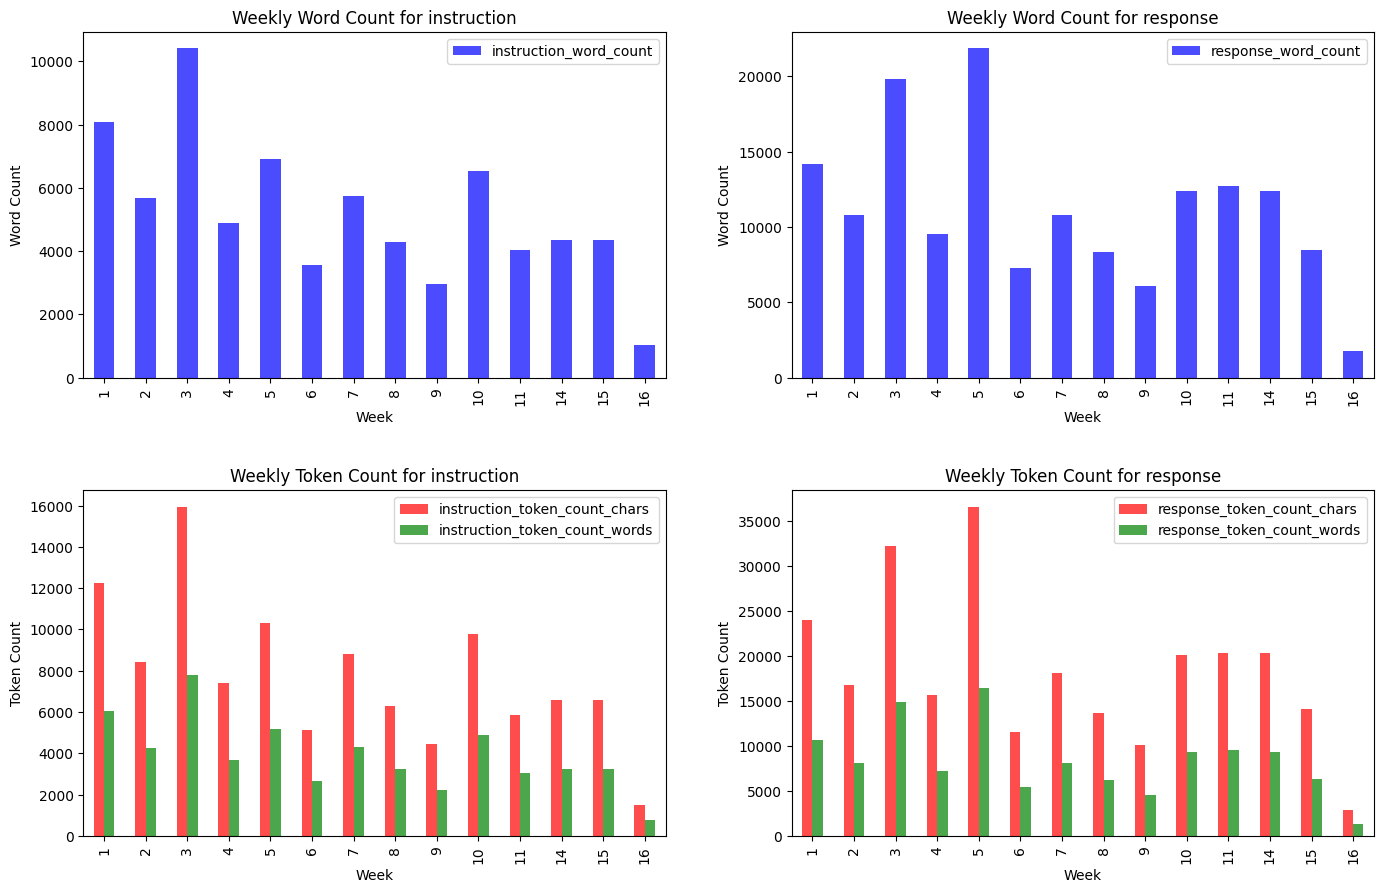

In [34]:
# Columns of interest
columns_of_interest = ['instruction', 'response']

# Function to count words in a string
def count_words(s):
    return len(str(s).split())

# Function to count tokens based on character count
def count_tokens_from_chars(s):
    return len(s) / 4

# Function to count tokens based on word count
def count_tokens_from_words(word_count):
    return 3/4 * word_count

# Counting words and tokens for columns of interest
for column in columns_of_interest:
    word_count_col = column + '_word_count'
    df_qa[word_count_col] = df_qa[column].apply(count_words)
    df_qa[column + '_token_count_chars'] = df_qa[column].apply(count_tokens_from_chars)
    df_qa[column + '_token_count_words'] = df_qa[word_count_col].apply(count_tokens_from_words)

# Sum words and tokens for each week
weekly_word_tokens = df_qa.groupby('week').agg({
    'instruction_word_count': 'sum',
    'response_word_count': 'sum',
    'instruction_token_count_chars': 'sum',
    'response_token_count_chars': 'sum',
    'instruction_token_count_words': 'sum',
    'response_token_count_words': 'sum'
}).reset_index()

# Visualization
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.tight_layout(pad=6)

for index, column in enumerate(columns_of_interest):
    ax_word = axes[0, index]
    ax_token = axes[1, index]
    
    weekly_word_tokens.plot(x='week', y=[column + '_word_count'], kind='bar', ax=ax_word, color='blue', alpha=0.7)
    weekly_word_tokens.plot(x='week', y=[column + '_token_count_chars', column + '_token_count_words'], kind='bar', ax=ax_token, color=['red', 'green'], alpha=0.7)
    
    ax_word.set_title(f'Weekly Word Count for {column}')
    ax_word.set_xlabel('Week')
    ax_word.set_ylabel('Word Count')
    
    ax_token.set_title(f'Weekly Token Count for {column}')
    ax_token.set_xlabel('Week')
    ax_token.set_ylabel('Token Count')
    ax_token.legend()

plt.show()


In [7]:
# Functions to count words and tokens
def count_words(s):
    return len(str(s).split())

def count_tokens_from_chars(s):
    return len(s) / 4

def count_tokens_from_words(word_count):
    return 3/4 * word_count

# Calculating word and token counts
df_qa['instruction_word_count'] = df_qa['instruction'].apply(count_words)
df_qa['response_word_count'] = df_qa['response'].apply(count_words)
df_qa['instruction_token_count'] = df_qa['instruction_word_count'].apply(count_tokens_from_words) + df_qa['instruction'].apply(count_tokens_from_chars)
df_qa['response_token_count'] = df_qa['response_word_count'].apply(count_tokens_from_words) + df_qa['response'].apply(count_tokens_from_chars)

# Creating the interactive plot
fig = go.Figure()

# For each week, create traces for the word and token counts per page
for week in df_qa['week'].unique():
    week_data = df_qa[df_qa['week'] == week]
    
    fig.add_trace(
        go.Scatter(
            x=week_data['page'], 
            y=week_data['instruction_word_count'],
            mode='lines+markers',
            name=f'Instruction Word Count (Week {week})',
            visible=(True if week == 1 else False)  # Only the first week's data is visible initially
        )
    )
    
    fig.add_trace(
        go.Scatter(
            x=week_data['page'], 
            y=week_data['response_word_count'],
            mode='lines+markers',
            name=f'Response Word Count (Week {week})',
            visible=(True if week == 1 else False)
        )
    )
    
    fig.add_trace(
        go.Scatter(
            x=week_data['page'], 
            y=week_data['instruction_token_count'],
            mode='lines+markers',
            name=f'Instruction Token Count (Week {week})',
            visible=(True if week == 1 else False)
        )
    )
    
    fig.add_trace(
        go.Scatter(
            x=week_data['page'], 
            y=week_data['response_token_count'],
            mode='lines+markers',
            name=f'Response Token Count (Week {week})',
            visible=(True if week == 1 else False)
        )
    )

# Dropdown menu
buttons = []
for i, week in enumerate(df_qa['week'].unique()):
    visible = [i==week-1 for j in range(4*len(df_qa['week'].unique()))]
    buttons.append(
        dict(
            label=f"Week {week}",
            method="update",
            args=[{"visible": visible},
                  {"title": f"Week {week} Word and Token Counts"}]
        )
    )

# Update layout for dropdown and other aesthetics
fig.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            active=0,
            buttons=buttons,
            x=1.1,
            xanchor="left",
            y=1.02,
            yanchor="top"
        ),
    ],
    title_text="Week 1 Word and Token Counts",
    xaxis_title="Page",
)

fig.show()


In [9]:
# Assuming df_qa is your dataframe
# Sample data processing has been done using your provided functions

# Initialize the Dash app with Bootstrap for styling
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define layout for the app
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='week-dropdown',
                options=[{'label': f"Week {week}", 'value': week} for week in df_qa['week'].unique()],
                value=1
            )
        ], width=3),
    ], className='mb-4'),

    dbc.Row([
        dbc.Col([
            dcc.Graph(id='bar-graph')
        ], width=6),
        dbc.Col([
            dcc.Graph(id='distribution-graph')
        ], width=6)
    ]),
], fluid=True)


@app.callback(
    [Output('bar-graph', 'figure'),
     Output('distribution-graph', 'figure')],
    [Input('week-dropdown', 'value')]
)
def update_graphs(selected_week):
    # Filter data for the selected week
    week_data = df_qa[df_qa['week'] == selected_week]

    # Create bar graph
    fig_bar = go.Figure()
    fig_bar.add_trace(go.Bar(x=week_data['page'], y=week_data['instruction_word_count'], name='Instruction Word Count'))
    fig_bar.add_trace(go.Bar(x=week_data['page'], y=week_data['response_word_count'], name='Response Word Count'))
    fig_bar.add_trace(go.Bar(x=week_data['page'], y=week_data['instruction_token_count'], name='Instruction Token Count'))
    fig_bar.add_trace(go.Bar(x=week_data['page'], y=week_data['response_token_count'], name='Response Token Count'))
    fig_bar.update_layout(title=f'Word and Token Counts for Week {selected_week}', xaxis_title="Page", yaxis_title="Count")

    # Create distribution graph using seaborn
    fig_dist = go.Figure()
    for col in ['instruction_word_count', 'response_word_count', 'instruction_token_count', 'response_token_count']:
        sns_dist = sns.kdeplot(week_data[col], label=col)
        x = sns_dist.get_lines()[-1].get_xdata()
        y = sns_dist.get_lines()[-1].get_ydata()
        sns_dist.remove()
        fig_dist.add_trace(go.Scatter(x=x, y=y, mode='lines', name=col))

    fig_dist.update_layout(title=f'Distribution Curves for Week {selected_week}', xaxis_title="Value", yaxis_title="Density")

    return fig_bar, fig_dist


if __name__ == '__main__':
    app.run_server(debug=True)


In [11]:
# Assuming df_qa is your dataframe

# Initialize the Dash app with Bootstrap for styling
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define layout for the app
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='week-dropdown',
                options=[{'label': f"Week {week}", 'value': week} for week in df_qa['week'].unique()],
                value=1
            )
        ], width=3),
    ], className='mb-4'),

    dbc.Row([
        dbc.Col([dcc.Graph(id='instruction-word-bar')], width=3),
        dbc.Col([dcc.Graph(id='instruction-word-density')], width=3),
        dbc.Col([dcc.Graph(id='response-word-bar')], width=3),
        dbc.Col([dcc.Graph(id='response-word-density')], width=3),
    ], className='mb-4'),

    dbc.Row([
        dbc.Col([dcc.Graph(id='instruction-token-bar')], width=3),
        dbc.Col([dcc.Graph(id='instruction-token-density')], width=3),
        dbc.Col([dcc.Graph(id='response-token-bar')], width=3),
        dbc.Col([dcc.Graph(id='response-token-density')], width=3),
    ])
], fluid=True)


@app.callback(
    [
        Output('instruction-word-bar', 'figure'),
        Output('instruction-word-density', 'figure'),
        Output('response-word-bar', 'figure'),
        Output('response-word-density', 'figure'),
        Output('instruction-token-bar', 'figure'),
        Output('instruction-token-density', 'figure'),
        Output('response-token-bar', 'figure'),
        Output('response-token-density', 'figure')
    ],
    [Input('week-dropdown', 'value')]
)
def update_graphs(selected_week):
    # Filter data for the selected week
    week_data = df_qa[df_qa['week'] == selected_week]

    # Define a function to bucket data
    def bucket_data(data, bucket_size=100):
        return np.floor(data / bucket_size) * bucket_size

    # Create bar graph for instruction word count
    fig_instruction_word_bar = go.Figure()
    fig_instruction_word_bar.add_trace(go.Bar(x=week_data['page'], y=bucket_data(week_data['instruction_word_count'])))
    fig_instruction_word_bar.update_layout(title='Instruction Word Count', xaxis_title="Page", yaxis_title="Word Count")

    # Create bar graph for response word count
    fig_response_word_bar = go.Figure()
    fig_response_word_bar.add_trace(go.Bar(x=week_data['page'], y=bucket_data(week_data['response_word_count'])))
    fig_response_word_bar.update_layout(title='Response Word Count', xaxis_title="Page", yaxis_title="Word Count")

    # Create density plot for instruction word count using Histogram
    fig_instruction_word_density = go.Figure()
    fig_instruction_word_density.add_trace(go.Histogram(x=week_data['instruction_word_count'], nbinsx=30, histnorm='probability density'))
    fig_instruction_word_density.update_layout(title='Instruction Word Density', xaxis_title="Word Count", yaxis_title="Density")

    # Create density plot for response word count using Histogram
    fig_response_word_density = go.Figure()
    fig_response_word_density.add_trace(go.Histogram(x=week_data['response_word_count'], nbinsx=30, histnorm='probability density'))
    fig_response_word_density.update_layout(title='Response Word Density', xaxis_title="Word Count", yaxis_title="Density")

    # Create bar graph for instruction token count
    fig_instruction_token_bar = go.Figure()
    fig_instruction_token_bar.add_trace(go.Bar(x=week_data['page'], y=bucket_data(week_data['instruction_token_count'])))
    fig_instruction_token_bar.update_layout(title='Instruction Token Count', xaxis_title="Page", yaxis_title="Token Count")

    # Create bar graph for response token count
    fig_response_token_bar = go.Figure()
    fig_response_token_bar.add_trace(go.Bar(x=week_data['page'], y=bucket_data(week_data['response_token_count'])))
    fig_response_token_bar.update_layout(title='Response Token Count', xaxis_title="Page", yaxis_title="Token Count")

    # Create density plot for instruction token count using Histogram
    fig_instruction_token_density = go.Figure()
    fig_instruction_token_density.add_trace(go.Histogram(x=week_data['instruction_token_count'], nbinsx=30, histnorm='probability density'))
    fig_instruction_token_density.update_layout(title='Instruction Token Density', xaxis_title="Token Count", yaxis_title="Density")

    # Create density plot for response token count using Histogram
    fig_response_token_density = go.Figure()
    fig_response_token_density.add_trace(go.Histogram(x=week_data['response_token_count'], nbinsx=30, histnorm='probability density'))
    fig_response_token_density.update_layout(title='Response Token Density', xaxis_title="Token Count", yaxis_title="Density")

    return (fig_instruction_word_bar, fig_instruction_word_density, fig_response_word_bar, fig_response_word_density,
            fig_instruction_token_bar, fig_instruction_token_density, fig_response_token_bar, fig_response_token_density)


if __name__ == '__main__':
    app.run_server(debug=True)


In [23]:
# Initialize the Dash app with Bootstrap for styling
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define layout for the app
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='week-dropdown',
                options=[{'label': f"Week {week}", 'value': week} for week in df_qa['week'].unique()],
                value=1
            )
        ], width=3),
    ], className='mb-4'),

    dbc.Row([
        dbc.Col([dcc.Graph(id='instruction-word-density')], width=6),
        dbc.Col([dcc.Graph(id='response-word-density')], width=6),
    ], className='mb-4'),

    dbc.Row([
        dbc.Col([dcc.Graph(id='instruction-token-density')], width=6),
        dbc.Col([dcc.Graph(id='response-token-density')], width=6),
    ])
], fluid=True)

@app.callback(
    [
        Output('instruction-word-density', 'figure'),
        Output('response-word-density', 'figure'),
        Output('instruction-token-density', 'figure'),
        Output('response-token-density', 'figure')
    ],
    [Input('week-dropdown', 'value')]
)
def update_graphs(selected_week):
    # Filter data for the selected week
    week_data = df_qa[df_qa['week'] == selected_week]

    # Create density plot for instruction word count using Histogram
    fig_instruction_word_density = go.Figure()
    fig_instruction_word_density.add_trace(go.Histogram(x=week_data['instruction_word_count'], nbinsx=30, histnorm='probability density'))
    fig_instruction_word_density.update_layout(title='Instruction Word Density', xaxis_title="Word Count", yaxis_title="Number of Slides")

    # Create density plot for response word count using Histogram
    fig_response_word_density = go.Figure()
    fig_response_word_density.add_trace(go.Histogram(x=week_data['response_word_count'], nbinsx=30, histnorm='probability density'))
    fig_response_word_density.update_layout(title='Response Word Density', xaxis_title="Word Count", yaxis_title="Number of Slides")

    # Create density plot for instruction token count using Histogram
    fig_instruction_token_density = go.Figure()
    fig_instruction_token_density.add_trace(go.Histogram(x=week_data['instruction_token_count'], nbinsx=30, histnorm='probability density'))
    fig_instruction_token_density.update_layout(title='Instruction Token Density', xaxis_title="Token Count", yaxis_title="Number of Slides")

    # Create density plot for response token count using Histogram
    fig_response_token_density = go.Figure()
    fig_response_token_density.add_trace(go.Histogram(x=week_data['response_token_count'], nbinsx=30, histnorm='probability density'))
    fig_response_token_density.update_layout(title='Response Token Density', xaxis_title="Token Count", yaxis_title="Number of Slides")

    return fig_instruction_word_density, fig_response_word_density, fig_instruction_token_density, fig_response_token_density

if __name__ == '__main__':
    app.run_server(debug=True)


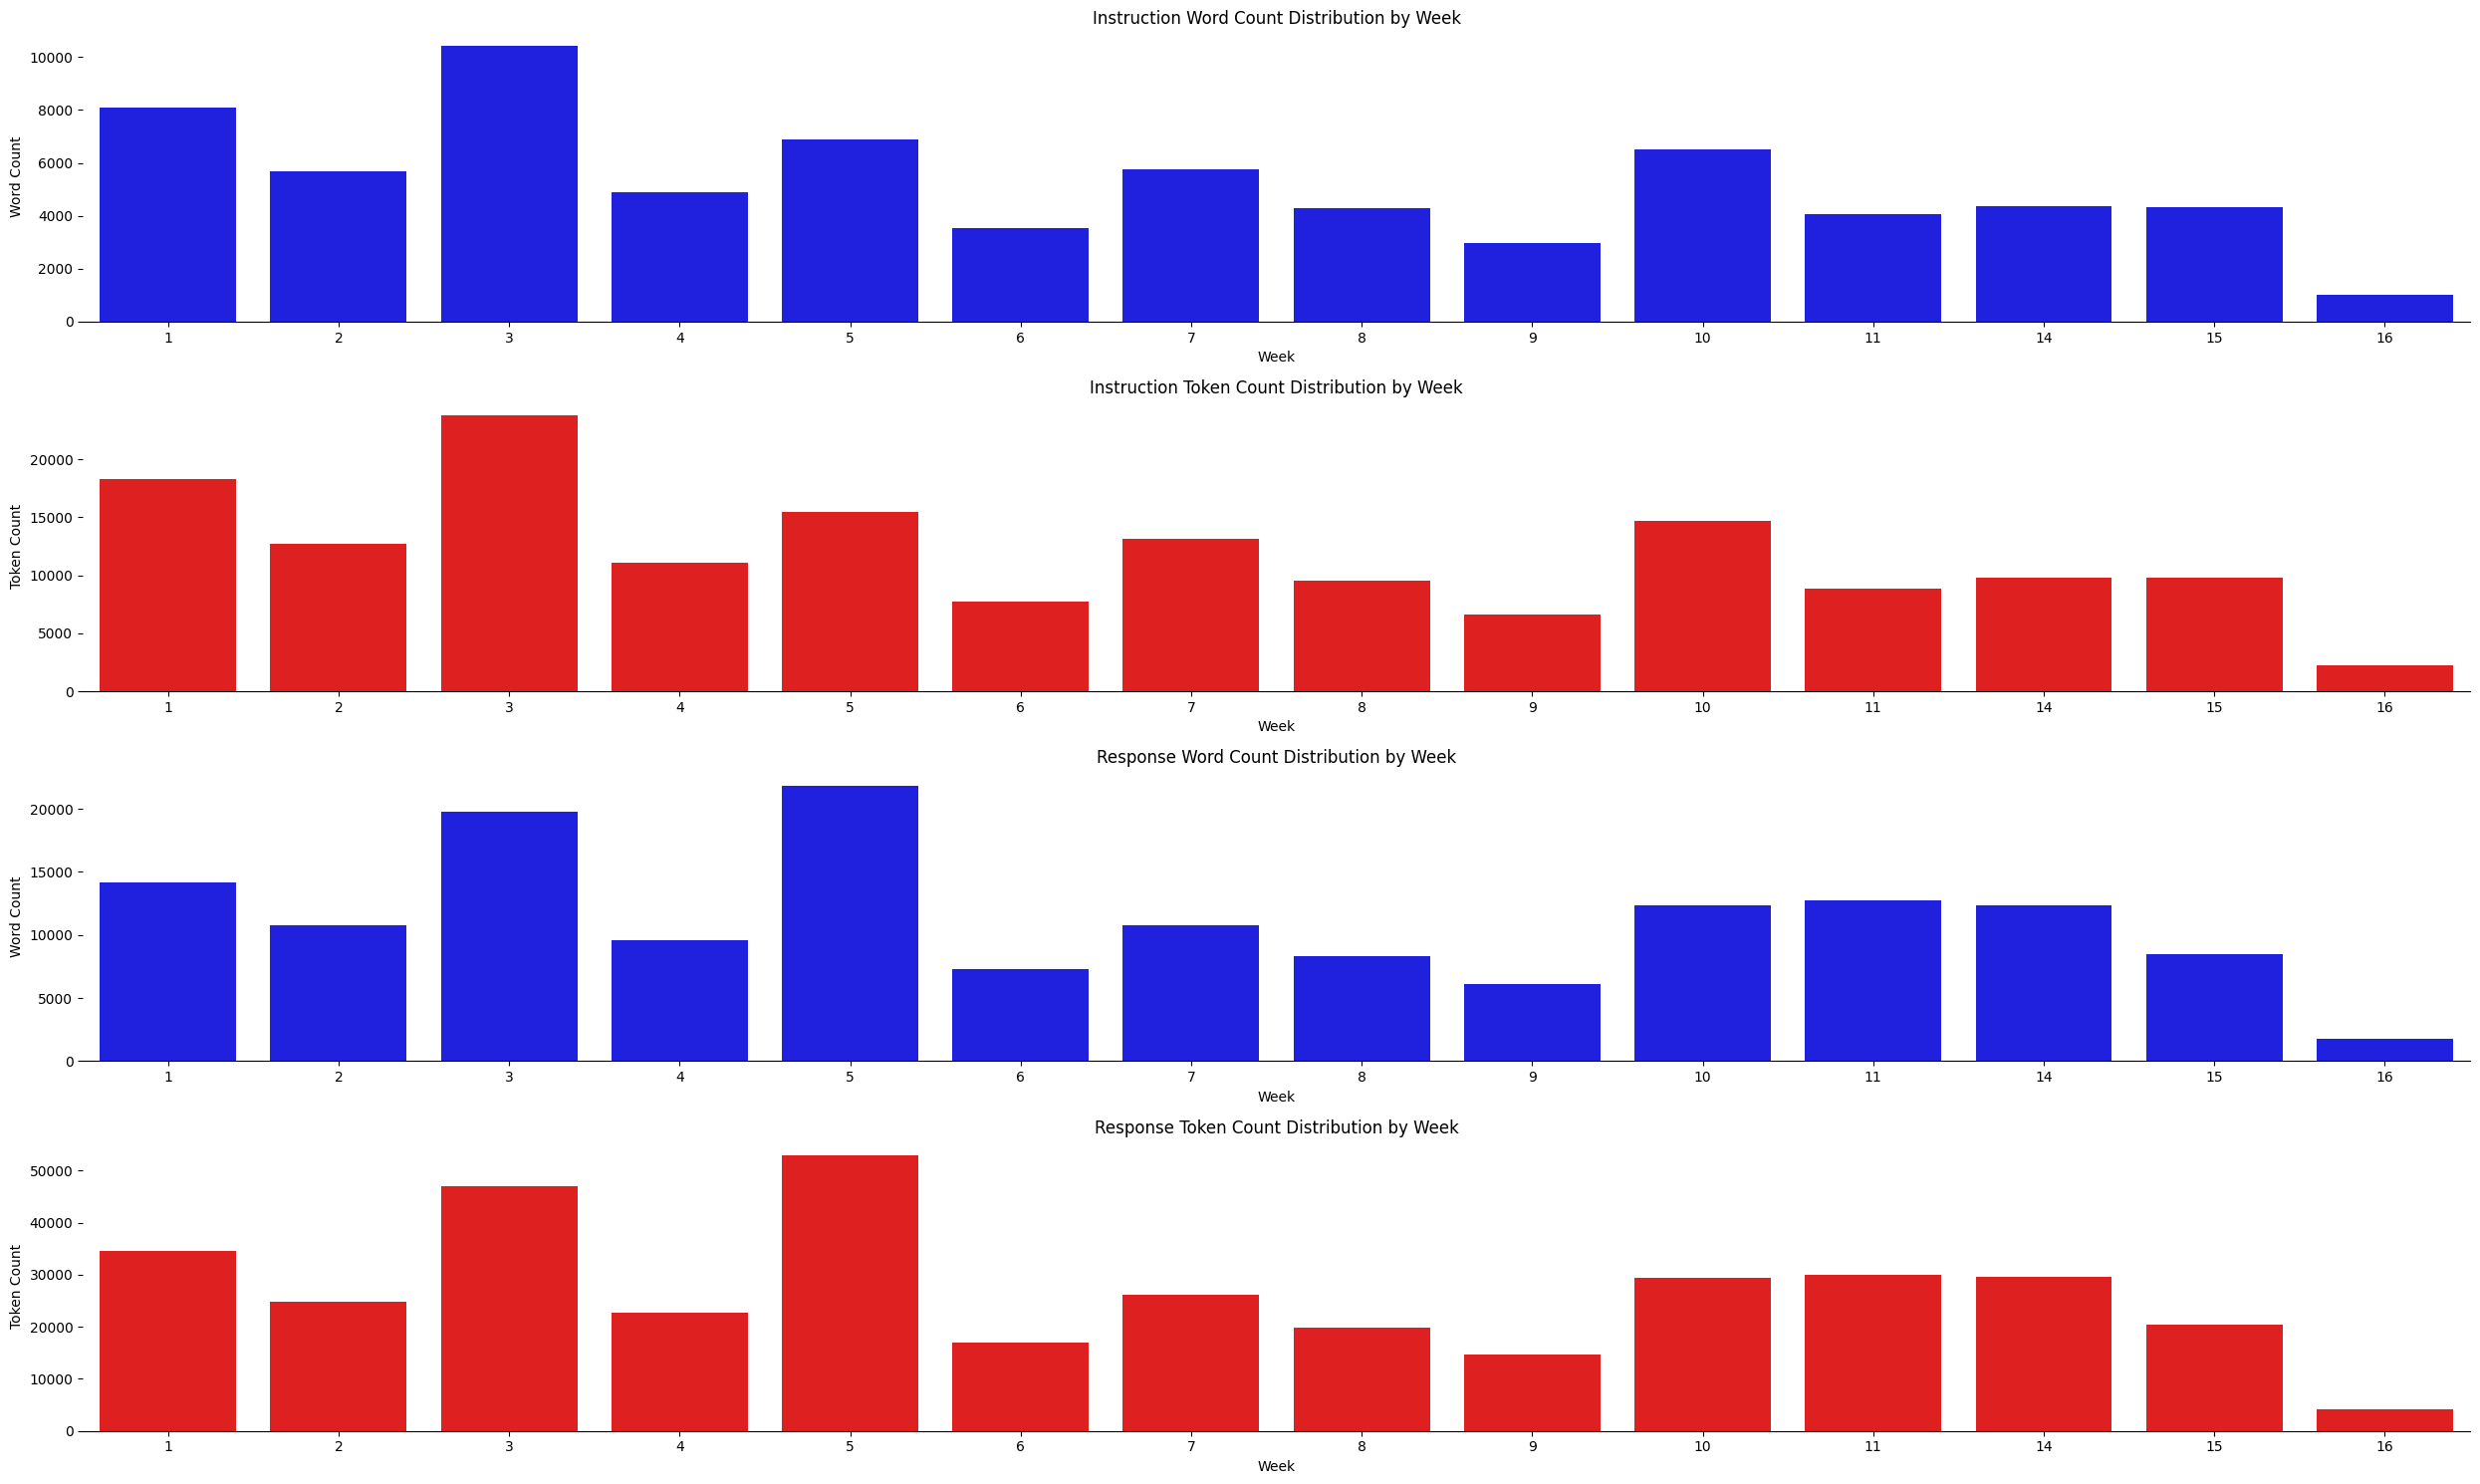

In [25]:
# Assuming the word and token counting functions are defined elsewhere...

# Calculate word counts and token counts for 'instruction' and 'response' columns
df_qa['instruction_word_count'] = df_qa['instruction'].apply(count_words)
df_qa['response_word_count'] = df_qa['response'].apply(count_words)
df_qa['instruction_token_count'] = df_qa['instruction_word_count'].apply(count_tokens_from_words) + df_qa['instruction'].apply(count_tokens_from_chars)
df_qa['response_token_count'] = df_qa['response_word_count'].apply(count_tokens_from_words) + df_qa['response'].apply(count_tokens_from_chars)

# Group by weeks
grouped = df_qa.groupby('week').sum()

# Set up the matplotlib figure
f, axes = plt.subplots(4, 1, figsize=(25, 15))
sns.despine(left=True)

# Bar plot for 'instruction_word_count' grouped by week
sns.barplot(x=grouped.index, y=grouped['instruction_word_count'], ax=axes[0], color="b")
axes[0].set_title('Instruction Word Count Distribution by Week')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Word Count')

# Bar plot for 'instruction_token_count' grouped by week
sns.barplot(x=grouped.index, y=grouped['instruction_token_count'], ax=axes[1], color="r")
axes[1].set_title('Instruction Token Count Distribution by Week')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Token Count')

# Bar plot for 'response_word_count' grouped by week
sns.barplot(x=grouped.index, y=grouped['response_word_count'], ax=axes[2], color="b")
axes[2].set_title('Response Word Count Distribution by Week')
axes[2].set_xlabel('Week')
axes[2].set_ylabel('Word Count')

# Bar plot for 'response_token_count' grouped by week
sns.barplot(x=grouped.index, y=grouped['response_token_count'], ax=axes[3], color="r")
axes[3].set_title('Response Token Count Distribution by Week')
axes[3].set_xlabel('Week')
axes[3].set_ylabel('Token Count')

plt.tight_layout()
plt.show()


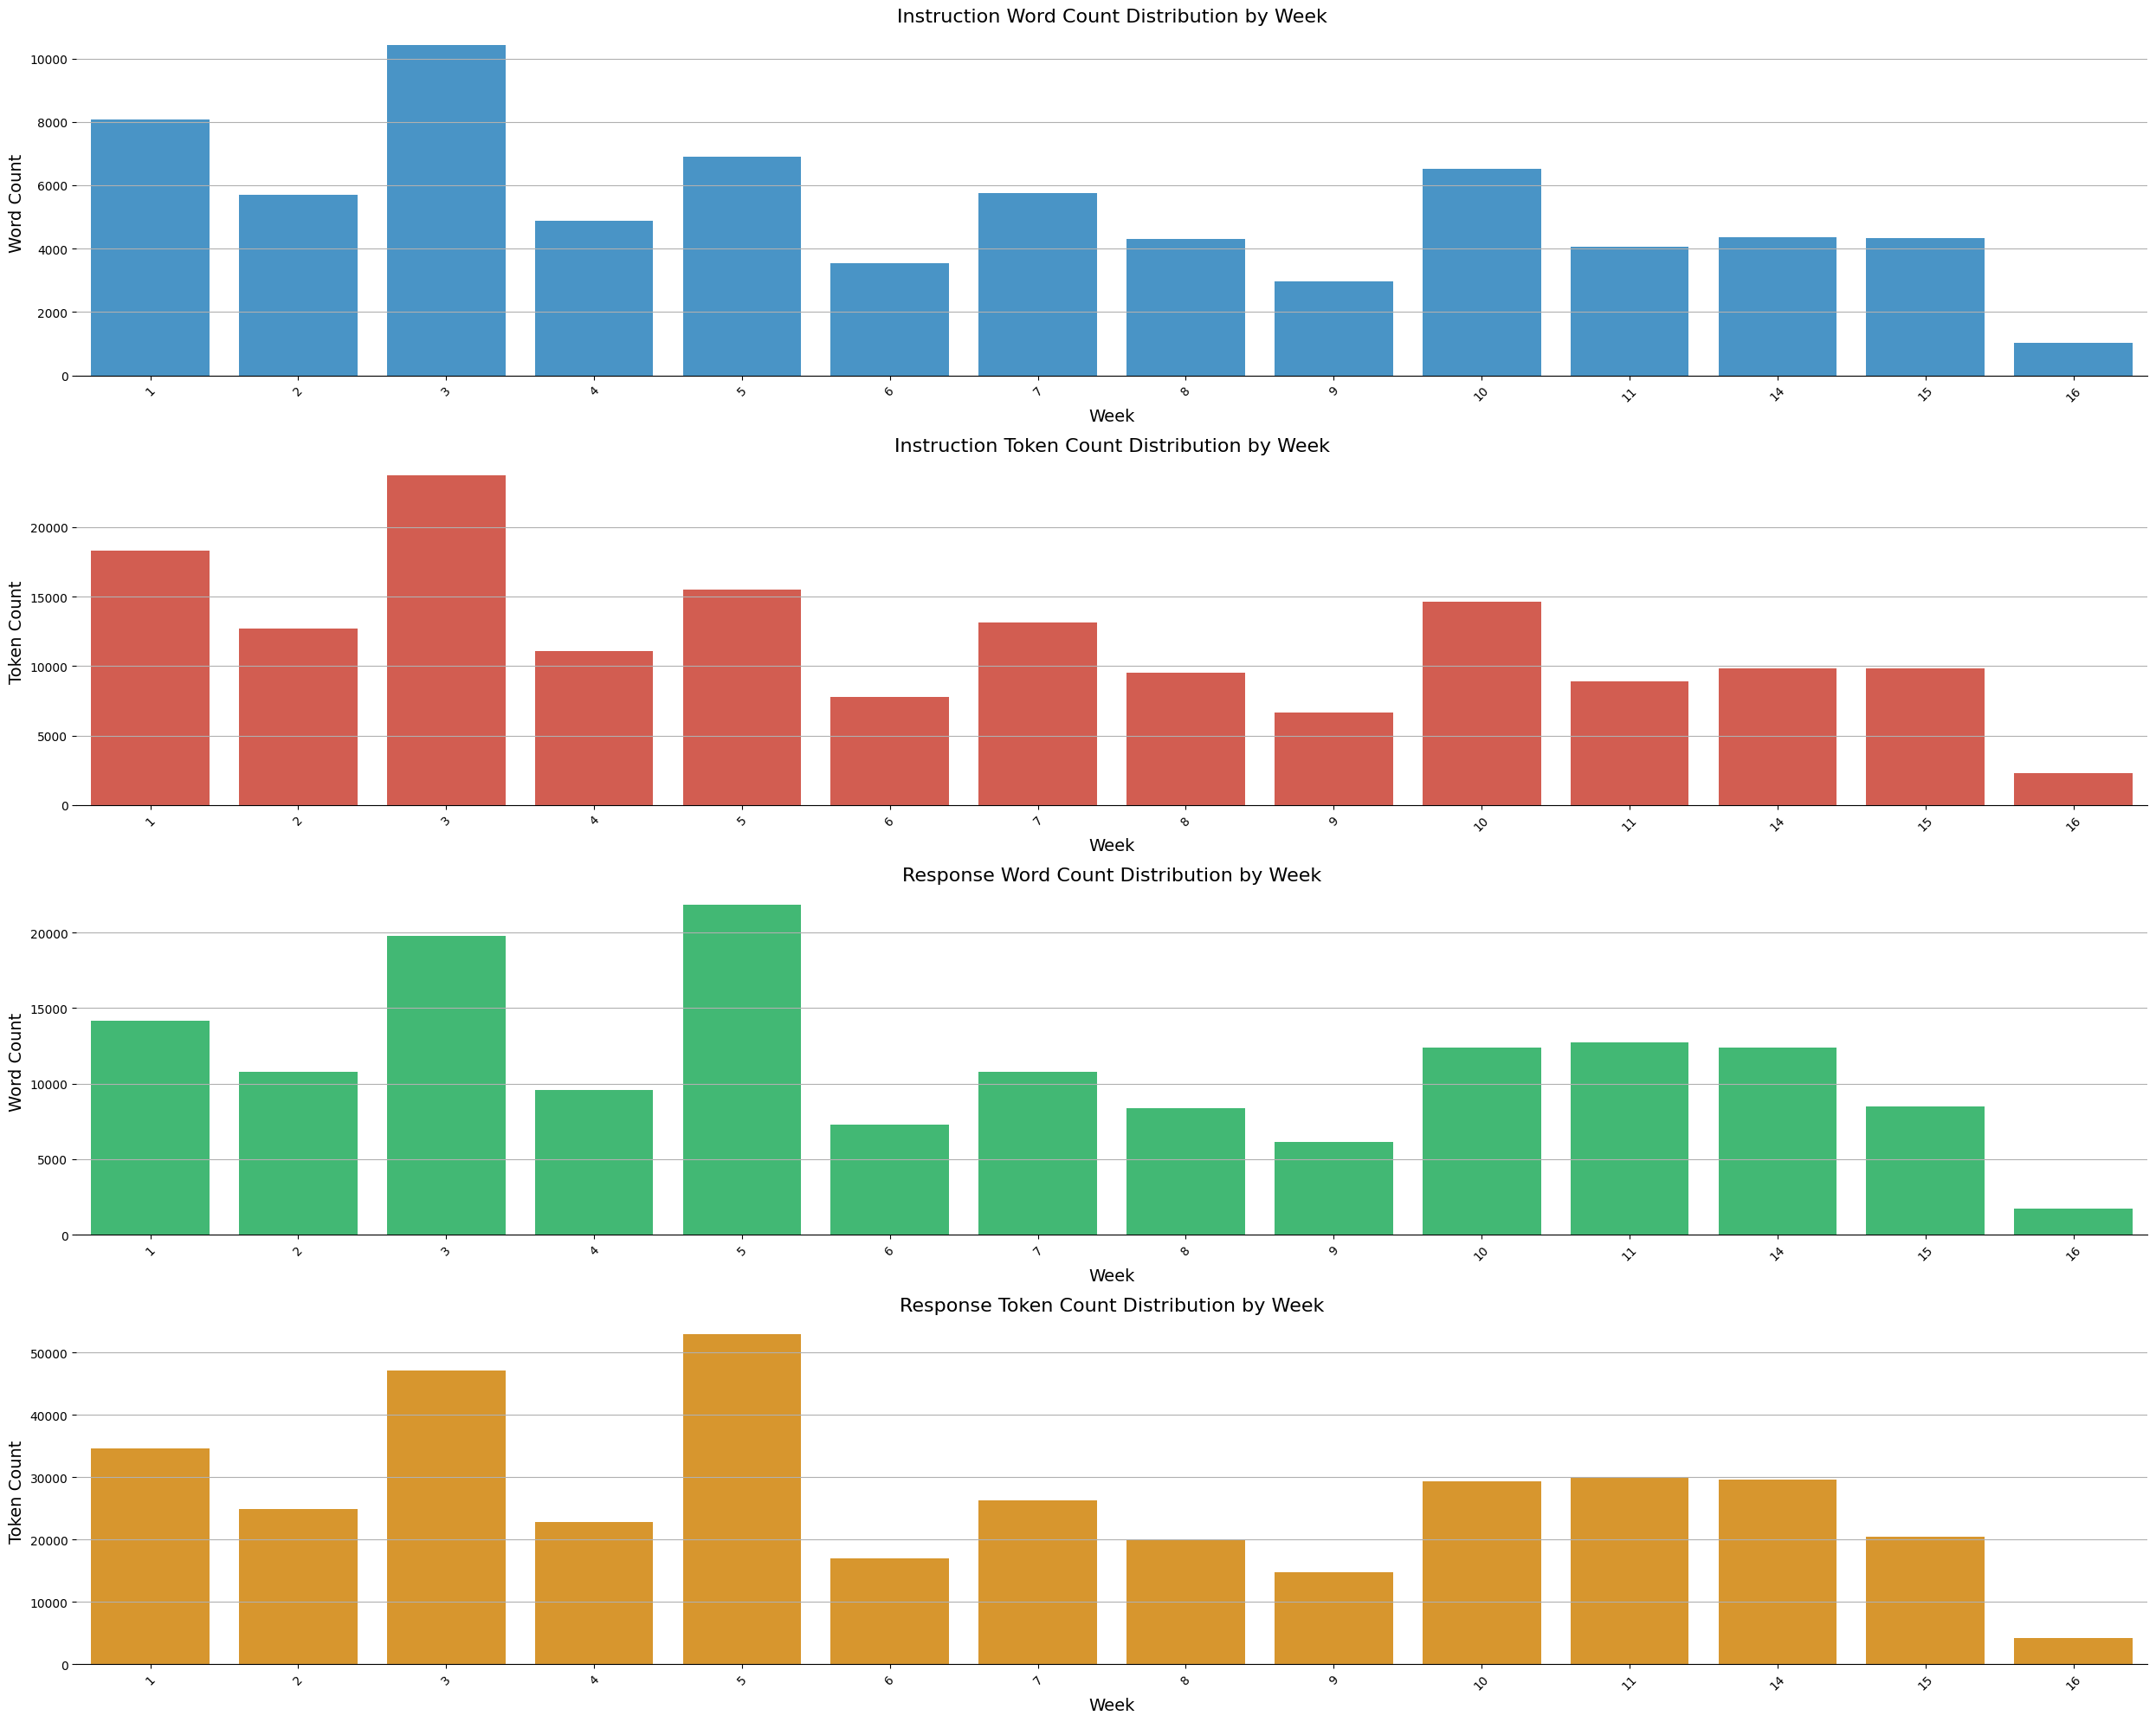

In [27]:
# Calculate word counts and token counts for 'instruction' and 'response' columns
df_qa['instruction_word_count'] = df_qa['instruction'].apply(count_words)
df_qa['response_word_count'] = df_qa['response'].apply(count_words)
df_qa['instruction_token_count'] = df_qa['instruction_word_count'].apply(count_tokens_from_words) + df_qa['instruction'].apply(count_tokens_from_chars)
df_qa['response_token_count'] = df_qa['response_word_count'].apply(count_tokens_from_words) + df_qa['response'].apply(count_tokens_from_chars)

# Group by weeks
grouped = df_qa.groupby('week').sum()

# Set up the matplotlib figure
f, axes = plt.subplots(4, 1, figsize=(25, 20), facecolor="white")
sns.despine(left=True)

# Colors
palette = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12"]

# Bar plot for 'instruction_word_count' grouped by week
sns.barplot(x=grouped.index, y=grouped['instruction_word_count'], ax=axes[0], color=palette[0])
axes[0].set_title('Instruction Word Count Distribution by Week', fontsize=16)
axes[0].set_xlabel('Week', fontsize=14)
axes[0].set_ylabel('Word Count', fontsize=14)
axes[0].grid(axis='y')
axes[0].tick_params(axis="x", rotation=45)

# Bar plot for 'instruction_token_count' grouped by week
sns.barplot(x=grouped.index, y=grouped['instruction_token_count'], ax=axes[1], color=palette[1])
axes[1].set_title('Instruction Token Count Distribution by Week', fontsize=16)
axes[1].set_xlabel('Week', fontsize=14)
axes[1].set_ylabel('Token Count', fontsize=14)
axes[1].grid(axis='y')
axes[1].tick_params(axis="x", rotation=45)

# Bar plot for 'response_word_count' grouped by week
sns.barplot(x=grouped.index, y=grouped['response_word_count'], ax=axes[2], color=palette[2])
axes[2].set_title('Response Word Count Distribution by Week', fontsize=16)
axes[2].set_xlabel('Week', fontsize=14)
axes[2].set_ylabel('Word Count', fontsize=14)
axes[2].grid(axis='y')
axes[2].tick_params(axis="x", rotation=45)

# Bar plot for 'response_token_count' grouped by week
sns.barplot(x=grouped.index, y=grouped['response_token_count'], ax=axes[3], color=palette[3])
axes[3].set_title('Response Token Count Distribution by Week', fontsize=16)
axes[3].set_xlabel('Week', fontsize=14)
axes[3].set_ylabel('Token Count', fontsize=14)
axes[3].grid(axis='y')
axes[3].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tiktoken import count_tokens, get_encoding

# Sample data initialization (remove or modify with your actual data)
# df_qa = pd.DataFrame({
#     'instruction': [...],
#     'response': [...],
#     'week': [...]
# })

# Initialize tiktoken tokenizer
enc = get_encoding("cl100k_base")  # Or other encodings as appropriate

def tokenize_count(text):
    return count_tokens(text, enc)

# Calculate token counts for 'instruction' and 'response' columns
df_qa['instruction_token_count'] = df_qa['instruction'].apply(tokenize_count)
df_qa['response_token_count'] = df_qa['response'].apply(tokenize_count)

# Group by weeks
grouped = df_qa.groupby('week').sum()

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(25, 20), facecolor="white")
sns.despine(left=True)

# Colors
palette = ["#3498db", "#e74c3c"]

# Bar plot for 'instruction_token_count' grouped by week
sns.barplot(x=grouped.index, y=grouped['instruction_token_count'], ax=axes[0], color=palette[0])
axes[0].set_title('Instruction Token Count Distribution by Week', fontsize=16)
axes[0].set_xlabel('Week', fontsize=14)
axes[0].set_ylabel('Token Count', fontsize=14)
axes[0].grid(axis='y')
axes[0].tick_params(axis="x", rotation=45)

# Bar plot for 'response_token_count' grouped by week
sns.barplot(x=grouped.index, y=grouped['response_token_count'], ax=axes[1], color=palette[1])
axes[1].set_title('Response Token Count Distribution by Week', fontsize=16)
axes[1].set_xlabel('Week', fontsize=14)
axes[1].set_ylabel('Token Count', fontsize=14)
axes[1].grid(axis='y')
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


ImportError: cannot import name 'count_tokens' from 'tiktoken' (/Users/manishkumarthota/projects/LlaVA/llava_env/lib/python3.9/site-packages/tiktoken/__init__.py)

In [13]:
import tiktoken
enc = tiktoken.get_encoding("cl100k_base")
assert enc.decode(enc.encode("hello world")) == "hello world"

# To get the tokeniser corresponding to a specific model in the OpenAI API:
enc = tiktoken.encoding_for_model("gpt-4")

In [14]:
df_qa

NameError: name 'df_qa' is not defined

In [36]:
import tiktoken

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [43]:
for j, row in df_qa.iterrows():
   print(len(row['instruction'].split()))
    

5
7
5
7
7
5
8
6
10
7
5
8
7
7
7
7
8
5
7
8
5
8
6
5
10
4
4
7
10
6
5
8
9
6
8
16
6
6
8
11
5
8
10
8
10
8
12
8
10
7
5
8
9
6
9
9
9
9
8
8
5
8
6
11
11
6
7
9
7
8
5
8
5
9
7
3
8
7
8
6
10
7
10
10
9
5
8
6
6
7
7
9
5
4
9
5
8
6
7
5
6
10
7
6
11
5
8
6
9
6
5
8
5
8
8
5
8
6
8
6
4
7
7
8
8
5
6
7
7
7
6
7
6
8
11
5
6
10
7
7
6
9
10
8
8
5
8
7
7
8
8
6
6
9
7
5
6
9
7
10
5
5
5
6
6
7
8
9
10
8
5
8
6
6
8
6
11
7
11
4
8
9
8
6
8
5
6
4
5
9
6
6
9
8
9
8
8
7
11
8
5
7
7
7
7
7
6
7
7
6
7
7
5
8
7
5
7
7
6
9
5
7
6
8
8
7
6
8
8
6
9
8
7
6
9
5
9
6
8
7
7
6
12
7
7
9
6
8
7
8
5
9
6
5
9
8
8
12
9
5
9
7
6
6
7
5
3
7
7
7
9
9
9
8
8
8
8
6
8
7
5
3
5
7
6
8
9
9
5
7
6
7
5
6
8
5
3
4
6
12
15
12
10
9
7
6
9
9
8
12
5
8
6
9
6
8
7
4
6
3
8
6
7
6
8
5
6
4
4
5
7
5
5
9
6
9
7
7
6
8
6
6
6
7
4
5
4
6
6
7
6
8
7
8
7
5
5
7
9
6
5
8
7
7
8
10
3
7
11
7
5
8
8
6
8
10
9
9
10
6
8
12
8
11
9
5
8
8
7
8
7
5
6
6
5
7
9
6
6
7
5
8
3
9
7
8
9
9
5
7
7
9
5
5
9
5
8
6
7
6
6
8
8
7
5
5
7
7
8
7
6
4
6
8
5
5
7
8
5
7
7
8
10
5
6
11
8
7
7
7
5
7
8
9
9
7
11
6
10
6
5
11
7
15
11
8
11
8
10
8
11
11
10
10
8


In [53]:
import tiktoken

word_token_counts = []

for j, row in df_qa.iterrows():
    tokens = num_tokens_from_string(row['instruction'], "cl100k_base")
    
    word_count = {
                    "index": j,
                    "week": row['week'],
                    "words": len(row['instruction'].split()),  # Splitting string into words and counting them
                    "tokens": tokens,
                    'page': row['page']
                }
    
    word_token_counts.append(word_count)

# Convert the list of dictionaries to a DataFrame for easier handling
df_word_token_counts = pd.DataFrame(word_token_counts)




In [54]:
# Print the result
df_word_token_counts

,index,week,words,tokens,page
0,0,1,5,6,1
1,1,1,7,8,1
2,2,1,5,6,1
3,3,1,7,9,1
4,4,1,7,8,1
...,...,...,...,...,...
8854,8854,16,5,6,12
8855,8855,16,8,9,12
8856,8856,16,6,7,12
8857,8857,16,6,7,12


/var/folders/5c/y8wl9_5d4ys64q5l4nf33s8c0000gn/T/ipykernel_48572/1260734709.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_word_token_counts, x='week', y='words', ax=axes[0], ci=None, color=palette[0], estimator=sum)
/var/folders/5c/y8wl9_5d4ys64q5l4nf33s8c0000gn/T/ipykernel_48572/1260734709.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_word_token_counts, x='week', y='tokens', ax=axes[1], ci=None, color=palette[1], estimator=sum)


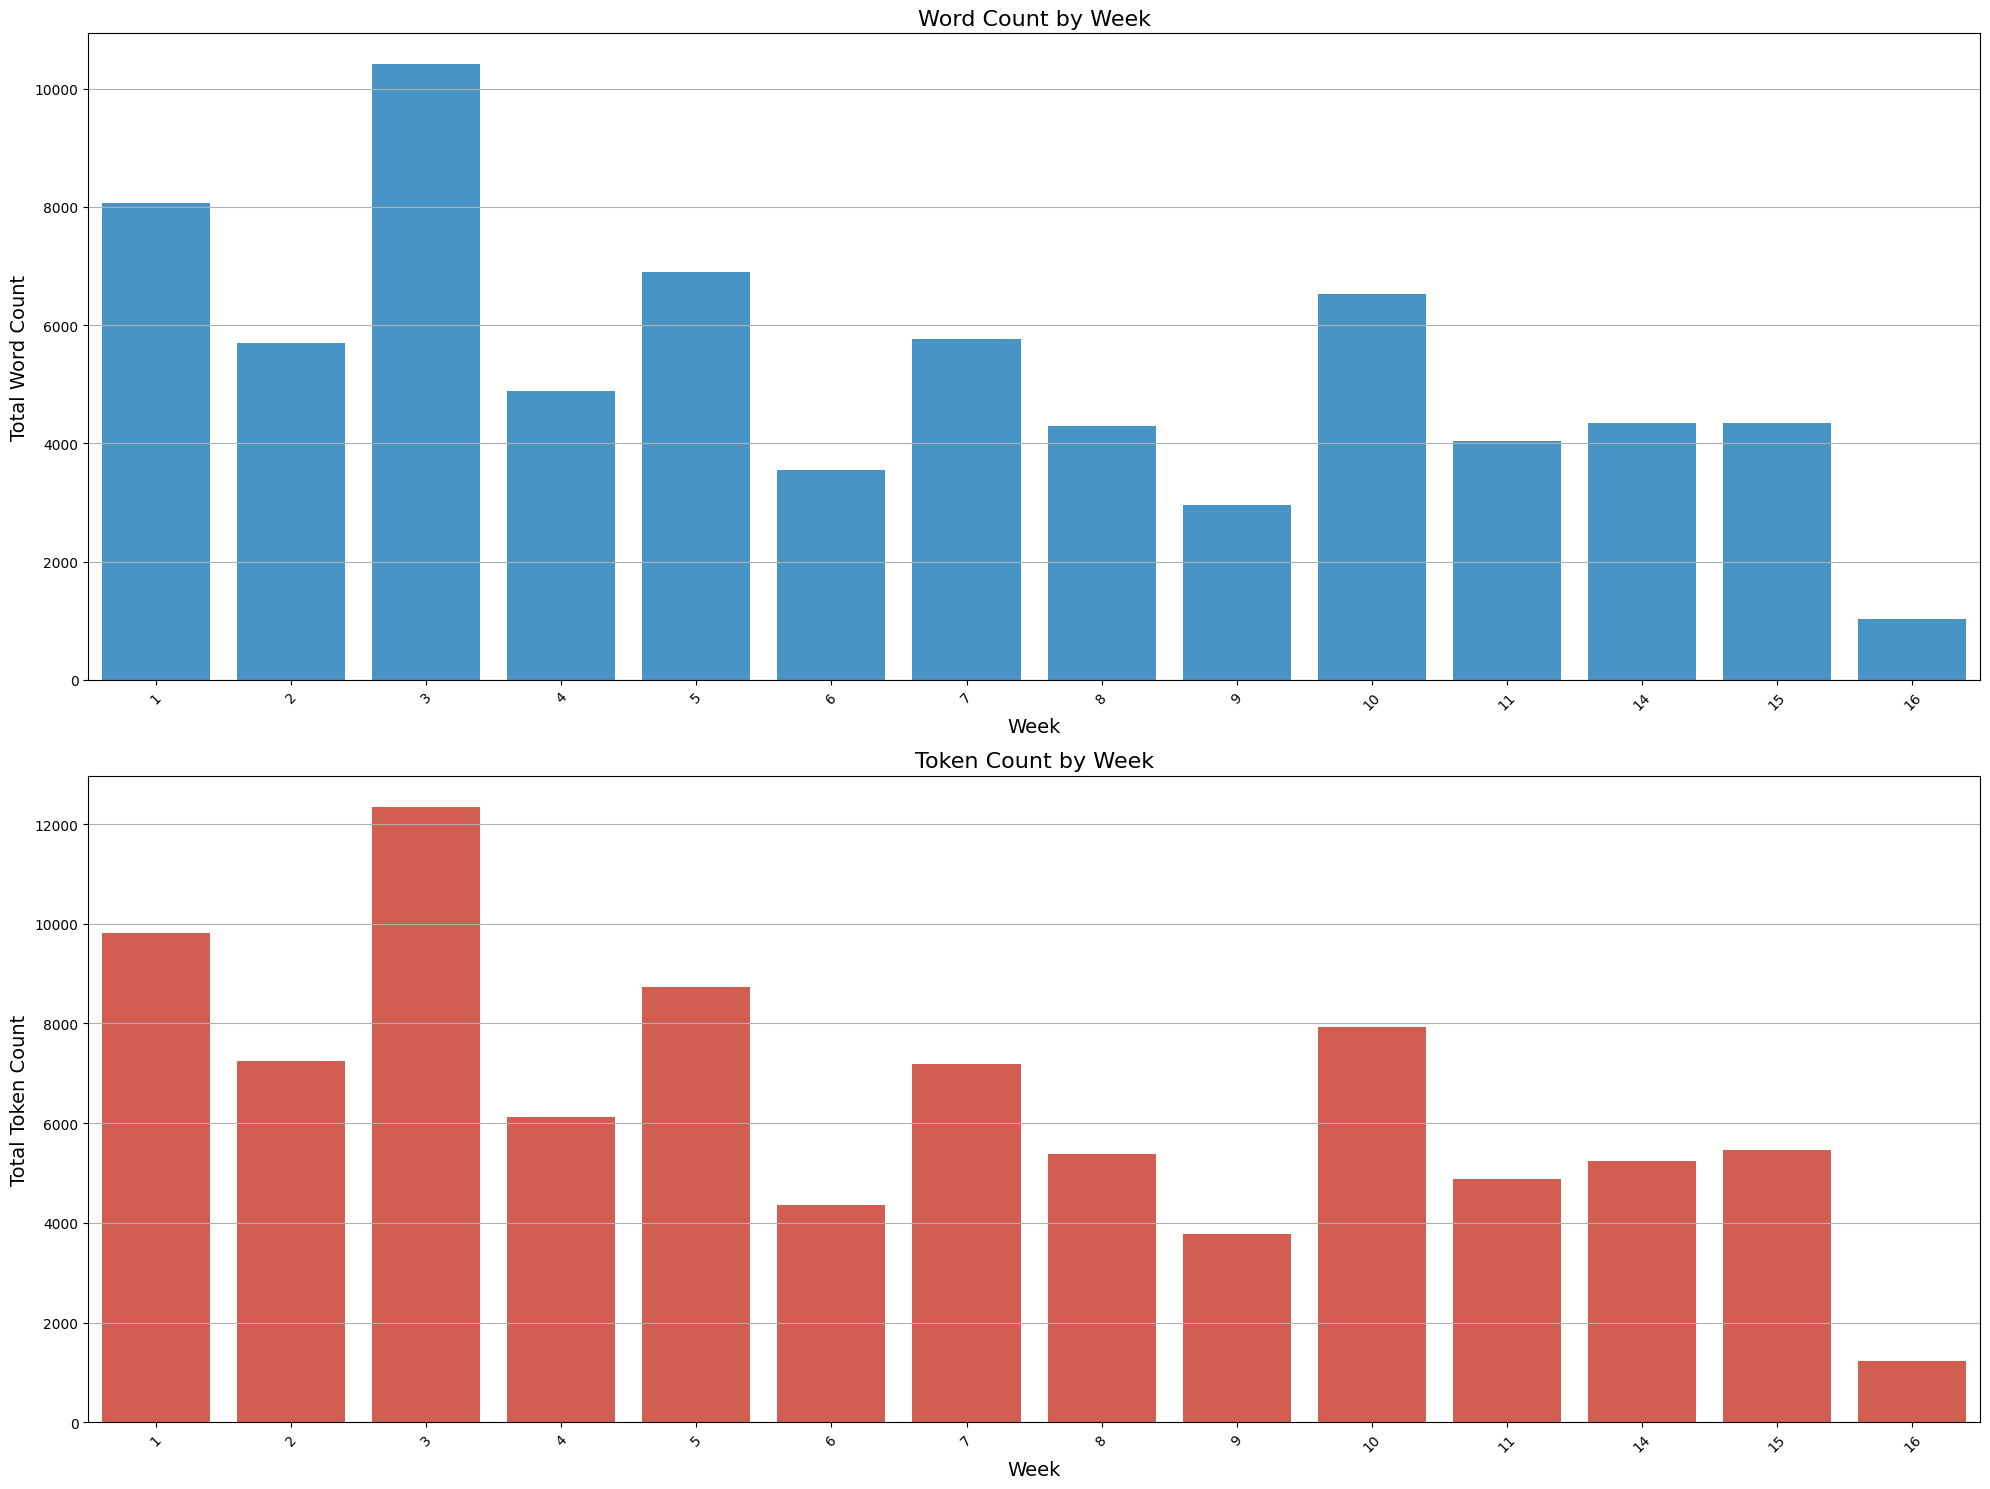

In [56]:

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(20, 15), facecolor="white")

# Colors
palette = ["#3498db", "#e74c3c"]

# Bar plot for 'words' grouped by week
sns.barplot(data=df_word_token_counts, x='week', y='words', ax=axes[0], ci=None, color=palette[0], estimator=sum)
axes[0].set_title('Word Count by Week', fontsize=16)
axes[0].set_xlabel('Week', fontsize=14)
axes[0].set_ylabel('Total Word Count', fontsize=14)
axes[0].grid(axis='y')
axes[0].tick_params(axis="x", rotation=45)

# Bar plot for 'tokens' grouped by week
sns.barplot(data=df_word_token_counts, x='week', y='tokens', ax=axes[1], ci=None, color=palette[1], estimator=sum)
axes[1].set_title('Token Count by Week', fontsize=16)
axes[1].set_xlabel('Week', fontsize=14)
axes[1].set_ylabel('Total Token Count', fontsize=14)
axes[1].grid(axis='y')
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


In [50]:
df_tra

,transcript,week,page
0,As you guys have probably already noticed that...,1,1
1,"And let me quickly talk about my research. So,...",1,2
2,"Let's see some of examples. So, first, right i...",1,3
3,And I will introduce one more of the previous ...,1,4
4,"And also, this is about another application in...",1,5
...,...,...,...
880,"So, we can apply for two kinds of jobs after s...",16,8
881,"For example, related to some machine learning ...",16,9
882,"So, let's say, some example job descriptions. ...",16,10
883,Next about your final project. We want to quic...,16,11


In [57]:
import tiktoken

word_token_counts_tra = []

for j, row in df_tra.iterrows():
    tokens = num_tokens_from_string(row['transcript'], "cl100k_base")
    
    word_count = {
                    "index": j,
                    "week": row['week'],
                    "words": len(row['transcript'].split()),  # Splitting string into words and counting them
                    "tokens": tokens
                }
    
    word_token_counts_tra.append(word_count)

# Convert the list of dictionaries to a DataFrame for easier handling
df_word_token_counts_tra = pd.DataFrame(word_token_counts_tra)




/var/folders/5c/y8wl9_5d4ys64q5l4nf33s8c0000gn/T/ipykernel_48572/1185678741.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_word_token_counts_tra, x='week', y='words', ax=axes[0], ci=None, color=palette[0], estimator=sum)
/var/folders/5c/y8wl9_5d4ys64q5l4nf33s8c0000gn/T/ipykernel_48572/1185678741.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_word_token_counts_tra, x='week', y='tokens', ax=axes[1], ci=None, color=palette[1], estimator=sum)


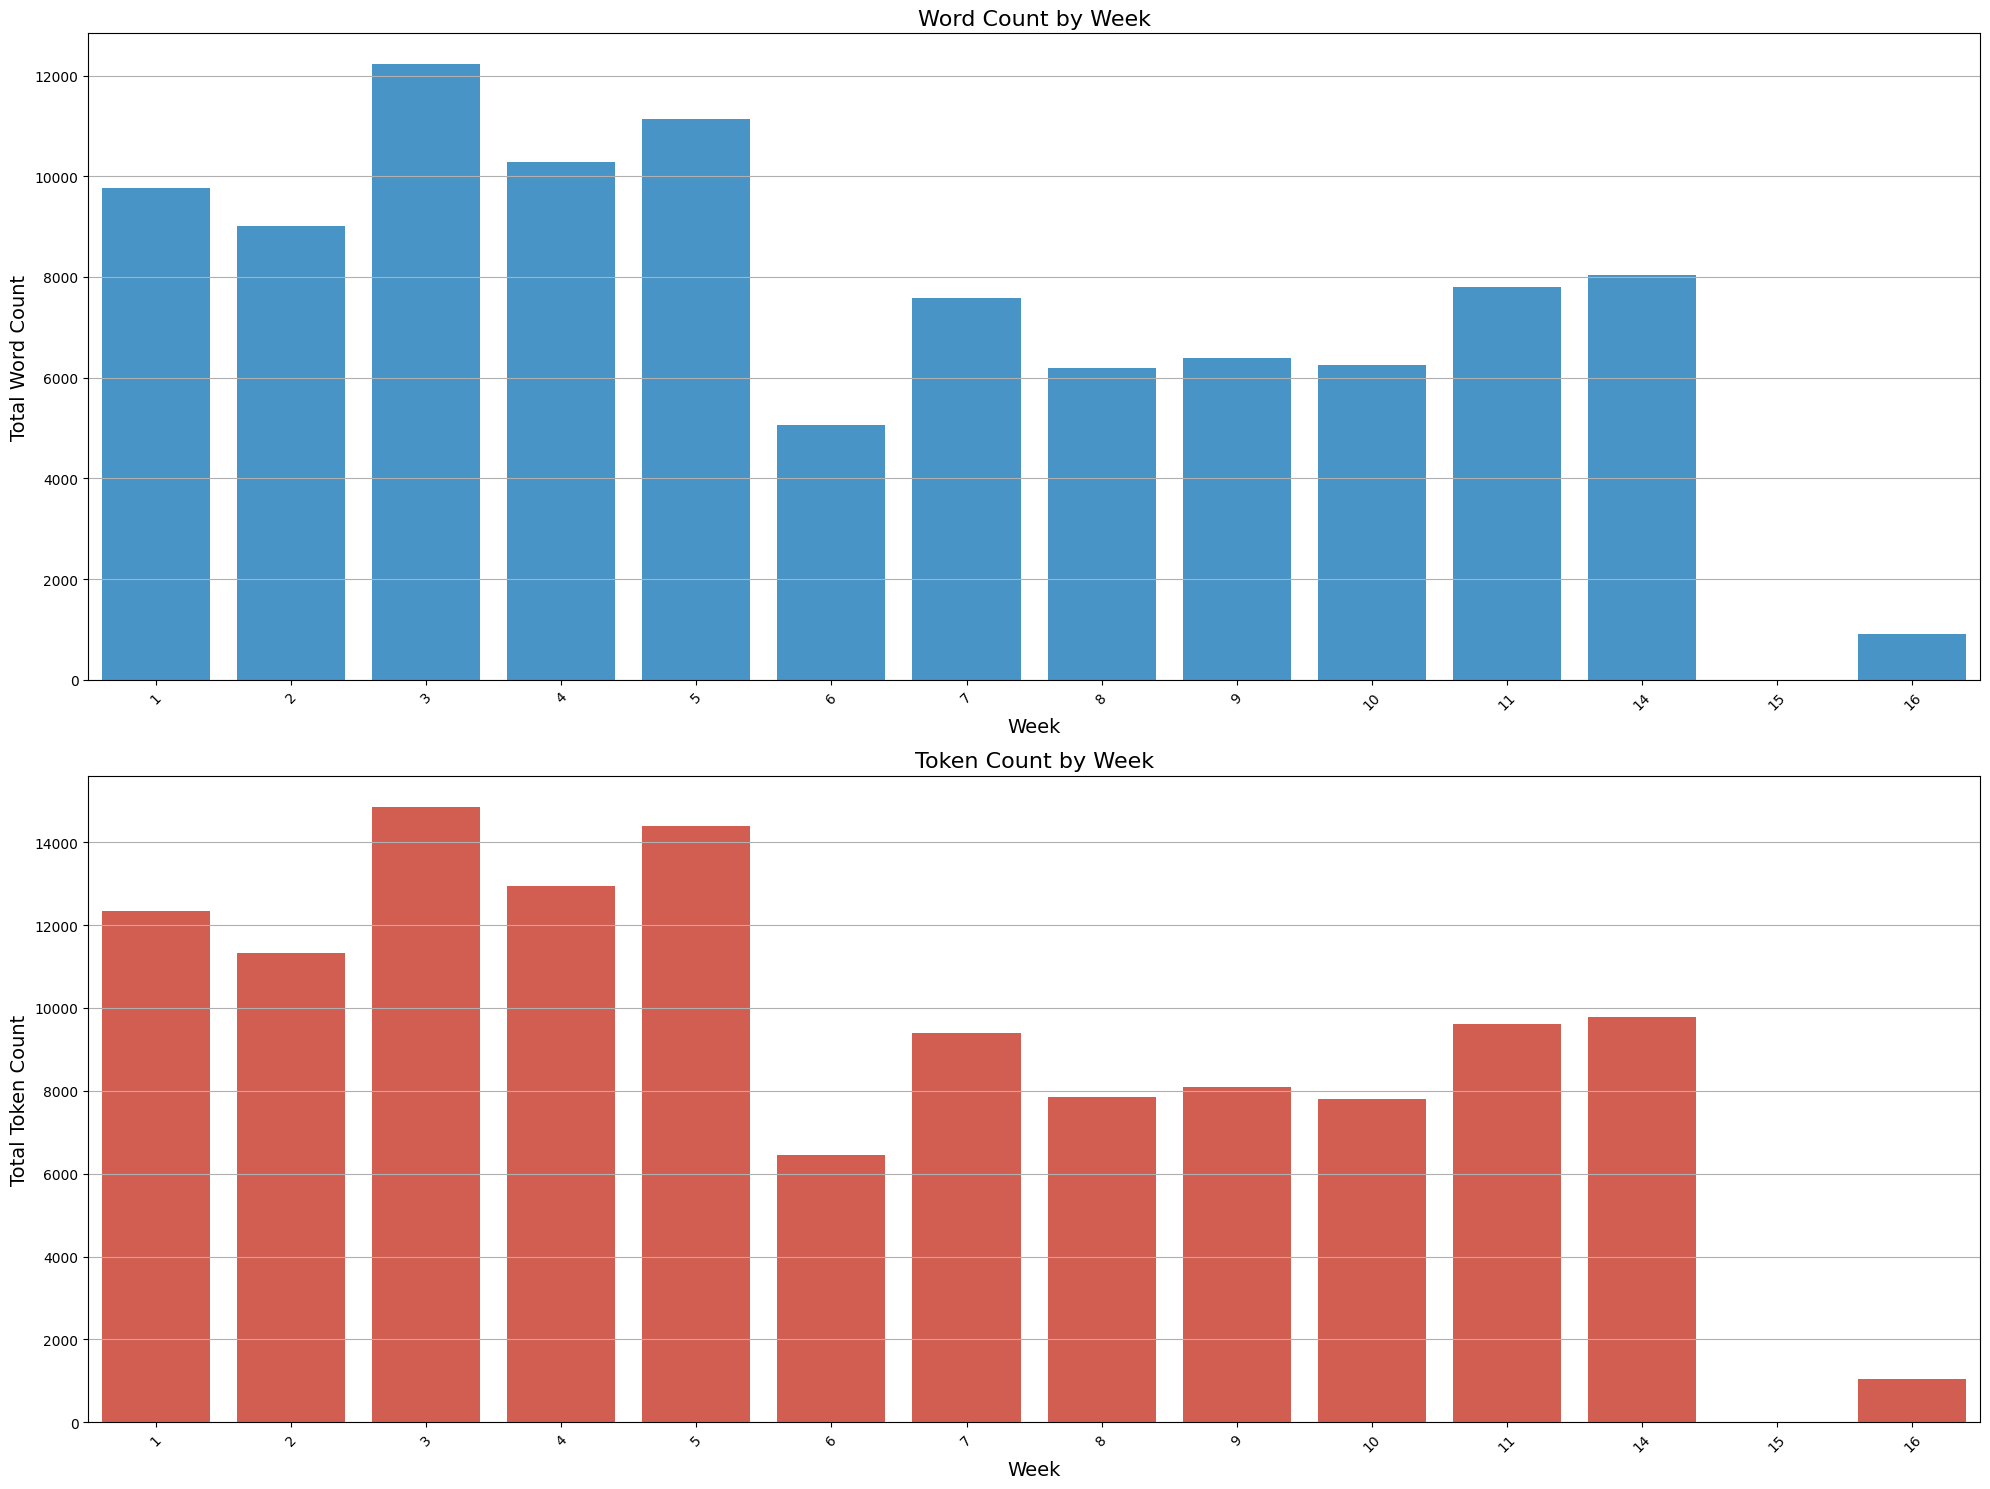

In [52]:

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(20, 15), facecolor="white")

# Colors
palette = ["#3498db", "#e74c3c"]

# Bar plot for 'words' grouped by week
sns.barplot(data=df_word_token_counts_tra, x='week', y='words', ax=axes[0], ci=None, color=palette[0], estimator=sum)
axes[0].set_title('Word Count by Week', fontsize=16)
axes[0].set_xlabel('Week', fontsize=14)
axes[0].set_ylabel('Total Word Count', fontsize=14)
axes[0].grid(axis='y')
axes[0].tick_params(axis="x", rotation=45)

# Bar plot for 'tokens' grouped by week
sns.barplot(data=df_word_token_counts_tra, x='week', y='tokens', ax=axes[1], ci=None, color=palette[1], estimator=sum)
axes[1].set_title('Token Count by Week', fontsize=16)
axes[1].set_xlabel('Week', fontsize=14)
axes[1].set_ylabel('Total Token Count', fontsize=14)
axes[1].grid(axis='y')
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


In [12]:
# Transformation function
def transform(row):
    new_path = row['path'].replace("imgs", "Images")
    img_id = row["name"].split(".")[0]
    return pd.Series([img_id, row["name"], " ", new_path], index=['id', 'image', 'transcript', 'path'])

# Apply transformation to the dataframe
transformed_df = df.apply(transform, axis=1)

# Convert the DataFrame to JSON
json_output = transformed_df.to_dict(orient='records')

print(json_output)

[{'id': 'week_01_page_001', 'image': 'week_01_page_001.png', 'transcript': ' ', 'path': '.\\data\\Images\\week_01\\week_01_page_001.png'}, {'id': 'week_01_page_002', 'image': 'week_01_page_002.png', 'transcript': ' ', 'path': '.\\data\\Images\\week_01\\week_01_page_002.png'}, {'id': 'week_01_page_003', 'image': 'week_01_page_003.png', 'transcript': ' ', 'path': '.\\data\\Images\\week_01\\week_01_page_003.png'}, {'id': 'week_01_page_004', 'image': 'week_01_page_004.png', 'transcript': ' ', 'path': '.\\data\\Images\\week_01\\week_01_page_004.png'}, {'id': 'week_01_page_005', 'image': 'week_01_page_005.png', 'transcript': ' ', 'path': '.\\data\\Images\\week_01\\week_01_page_005.png'}, {'id': 'week_01_page_006', 'image': 'week_01_page_006.png', 'transcript': ' ', 'path': '.\\data\\Images\\week_01\\week_01_page_006.png'}, {'id': 'week_01_page_007', 'image': 'week_01_page_007.png', 'transcript': ' ', 'path': '.\\data\\Images\\week_01\\week_01_page_007.png'}, {'id': 'week_01_page_008', 'image

In [13]:
import json

# Given the json_output from the previous code
with open('meta_images.json', 'w') as json_file:
    json.dump(json_output, json_file, indent=4)


In [60]:
df_qa

,instruction,context,response,category,week,page
0,Can you explain this slide?,AIM 5005 Machine Learning slide,The slide introduces AIM 5005 Machine Learning...,summarization,1,1
1,Who is the instructor for this course?,AIM 5005 Machine Learning slide,The instructor is Dr. Youshan Zhang.,information_extraction,1,1
2,What is the course code?,AIM 5005 Machine Learning slide,The course code is AIM 5005.,information_extraction,1,1
3,What is the focus of Lecture 1?,AIM 5005 Machine Learning slide,Lecture 1 focuses on an introduction to machin...,closed_qa,1,1
4,What is the date of the lecture?,AIM 5005 Machine Learning slide,The lecture date is 01/18/2023.,information_extraction,1,1
...,...,...,...,...,...,...
8854,Can you explain this slide?,Slide titled 'Student Course Evaluation',The slide is titled 'Student Course Evaluation...,summarization,16,12
8855,What is the main topic of the slide?,Slide titled 'Student Course Evaluation',The main topic of the slide is 'Student Course...,information_extraction,16,12
8856,Is this slide about gathering feedback?,Slide titled 'Student Course Evaluation',"Yes, the slide is likely about gathering feedb...",closed_qa,16,12
8857,Why might student evaluations be important?,Slide titled 'Student Course Evaluation',Student evaluations provide insights into cour...,brainstorming,16,12


In [61]:
df_qa['instruction'] = df_qa['instruction'].str.replace("Can you explain this slide?", "Can you summarise this slide?")


In [64]:
df_tra.head(10)

,transcript,week,page
0,As you guys have probably already noticed that...,1,1
1,"And let me quickly talk about my research. So,...",1,2
2,"Let's see some of examples. So, first, right i...",1,3
3,And I will introduce one more of the previous ...,1,4
4,"And also, this is about another application in...",1,5
5,And we also have applications. We rely see the...,1,6
6,And we also have other applications in the cow...,1,7
7,"And, basically, we have another lecture about ...",1,8
8,"And now we can quickly listen. For example, in...",1,9
9,"And then even further, we have other applicati...",1,10


In [68]:
# Create new rows from transcripts and append to the q and a dataframe
new_rows = []

for _, row in df_tra.iterrows():
    new_row = {
        'instruction': "Can you explain the slide?",
        'context': "",
        'response': row['transcript'],
        'category': "summarization",
        'week': row['week'],
        'page': row['page']
    }
    new_rows.append(new_row)

# Convert the list of dictionaries to a dataframe
new_df = pd.DataFrame(new_rows)

# Append the new dataframe to the original dataframe
df_qa_new = pd.concat([df_qa, new_df], ignore_index=True)




In [72]:
df

,name,path,week,page
0,week_01_page_001.png,.\data\imgs\week_01\week_01_page_001.png,1,1
1,week_01_page_002.png,.\data\imgs\week_01\week_01_page_002.png,1,2
2,week_01_page_003.png,.\data\imgs\week_01\week_01_page_003.png,1,3
3,week_01_page_004.png,.\data\imgs\week_01\week_01_page_004.png,1,4
4,week_01_page_005.png,.\data\imgs\week_01\week_01_page_005.png,1,5
...,...,...,...,...
653,week_16_page_008.png,.\data\imgs\week_16\week_16_page_008.png,16,8
654,week_16_page_009.png,.\data\imgs\week_16\week_16_page_009.png,16,9
655,week_16_page_010.png,.\data\imgs\week_16\week_16_page_010.png,16,10
656,week_16_page_011.png,.\data\imgs\week_16\week_16_page_011.png,16,11


In [75]:
df_qa.groupby(['week', 'page']).values

In [73]:
import pandas as pd
import uuid

# Sample dataframe initialization (replace with actual dataframe)
# df_qa = pd.DataFrame({...})
# df_image = pd.DataFrame({...})

# Grouping by week and page
                    pby(['week', 'page'])

result = []

for (week, page), group in grouped:
    # Fetch image path for current week and page
    image_path = df[(df['week'] == week) & (df['page'] == page)]['path'].values[0]
    
    # Construct conversations list
    conversations = []
    for _, row in group.iterrows():
        conversations.append({
            "from": "human",
            "value": row['instruction']
        })
        conversations.append({
            "from": "gpt",
            "value": row['response']
        })
    
    # Append to result
    result.append({
        "id": str(uuid.uuid4()),
        "image": image_path,
        "conversations": conversations
    })

# Convert to JSON
import json
json_str = json.dumps(result, indent=2)

print(json_str)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
[
  {
    "id": "997bb945-628d-4724-b370-b84de974a19f",
    "image": "part-000001/997bb945-628d-4724-b370-b84de974a19f.jpg",
    "conversations": [
      {
        "from": "human",
        "value": "<image>\nWrite a prompt for Stable Diffusion to generate this image."
      },
      {
        "from": "gpt",
        "value": "a beautiful painting of chernobyl by nekro, pascal blanche, john harris, greg rutkowski, sin jong hun, moebius, simon stalenhag. in style of cg art. ray tracing. cel shading. hyper detailed. realistic. ue 5. maya. octane render. "
      },
    ]
  },
  ...
]

In [ ]:

  {
    "id": ,
    "image": ,
    "conversations": [
      {
        "from": "human",
        "value": "<image>\n"
      },
      {
        "from": "gpt",
        "value": 
      },
    ]
  }

In [83]:
df

,name,path,week,page
0,week_01_page_001.png,.\data\imgs\week_01\week_01_page_001.png,1,1
1,week_01_page_002.png,.\data\imgs\week_01\week_01_page_002.png,1,2
2,week_01_page_003.png,.\data\imgs\week_01\week_01_page_003.png,1,3
3,week_01_page_004.png,.\data\imgs\week_01\week_01_page_004.png,1,4
4,week_01_page_005.png,.\data\imgs\week_01\week_01_page_005.png,1,5
...,...,...,...,...
653,week_16_page_008.png,.\data\imgs\week_16\week_16_page_008.png,16,8
654,week_16_page_009.png,.\data\imgs\week_16\week_16_page_009.png,16,9
655,week_16_page_010.png,.\data\imgs\week_16\week_16_page_010.png,16,10
656,week_16_page_011.png,.\data\imgs\week_16\week_16_page_011.png,16,11


In [82]:
df_qa_new

,instruction,context,response,category,week,page
0,Can you summarise this slide?,AIM 5005 Machine Learning slide,The slide introduces AIM 5005 Machine Learning...,summarization,1,1
1,Who is the instructor for this course?,AIM 5005 Machine Learning slide,The instructor is Dr. Youshan Zhang.,information_extraction,1,1
2,What is the course code?,AIM 5005 Machine Learning slide,The course code is AIM 5005.,information_extraction,1,1
3,What is the focus of Lecture 1?,AIM 5005 Machine Learning slide,Lecture 1 focuses on an introduction to machin...,closed_qa,1,1
4,What is the date of the lecture?,AIM 5005 Machine Learning slide,The lecture date is 01/18/2023.,information_extraction,1,1
...,...,...,...,...,...,...
9739,Can you explain the slide?,,"So, we can apply for two kinds of jobs after s...",summarization,16,8
9740,Can you explain the slide?,,"For example, related to some machine learning ...",summarization,16,9
9741,Can you explain the slide?,,"So, let's say, some example job descriptions. ...",summarization,16,10
9742,Can you explain the slide?,,Next about your final project. We want to quic...,summarization,16,11


In [80]:
merged_df

,name,path,week,page,instruction,context,response,category
0,week_01_page_001.png,.\data\imgs\week_01\week_01_page_001.png,1,1,Can you summarise this slide?,AIM 5005 Machine Learning slide,The slide introduces AIM 5005 Machine Learning...,summarization
1,week_01_page_001.png,.\data\imgs\week_01\week_01_page_001.png,1,1,Who is the instructor for this course?,AIM 5005 Machine Learning slide,The instructor is Dr. Youshan Zhang.,information_extraction
2,week_01_page_001.png,.\data\imgs\week_01\week_01_page_001.png,1,1,What is the course code?,AIM 5005 Machine Learning slide,The course code is AIM 5005.,information_extraction
3,week_01_page_001.png,.\data\imgs\week_01\week_01_page_001.png,1,1,What is the focus of Lecture 1?,AIM 5005 Machine Learning slide,Lecture 1 focuses on an introduction to machin...,closed_qa
4,week_01_page_001.png,.\data\imgs\week_01\week_01_page_001.png,1,1,What is the date of the lecture?,AIM 5005 Machine Learning slide,The lecture date is 01/18/2023.,information_extraction
...,...,...,...,...,...,...,...,...
6534,week_16_page_012.png,.\data\imgs\week_16\week_16_page_012.png,16,12,Can you summarise this slide?,Slide titled 'Student Course Evaluation',The slide is titled 'Student Course Evaluation...,summarization
6535,week_16_page_012.png,.\data\imgs\week_16\week_16_page_012.png,16,12,What is the main topic of the slide?,Slide titled 'Student Course Evaluation',The main topic of the slide is 'Student Course...,information_extraction
6536,week_16_page_012.png,.\data\imgs\week_16\week_16_page_012.png,16,12,Is this slide about gathering feedback?,Slide titled 'Student Course Evaluation',"Yes, the slide is likely about gathering feedb...",closed_qa
6537,week_16_page_012.png,.\data\imgs\week_16\week_16_page_012.png,16,12,Why might student evaluations be important?,Slide titled 'Student Course Evaluation',Student evaluations provide insights into cour...,brainstorming


In [ ]:
  conversations = []
    for _, row in group.iterrows():
        conversations.append({
            "from": "human",
            "value": row['instruction']
        })
        conversations.append({
            "from": "gpt",
            "value": row['response']
        })

In [129]:
total = 0
for i in range(1, 17):
    total += len(final_df[final_df['week']==i])
    print(f"week {i} - ",len(final_df[final_df['week']==i]))

    
    if i == 12 or 13:
        continue

print("Total Questions : ", total)

week 1 -  1090
week 2 -  765
week 3 -  1210
week 4 -  635
week 5 -  806
week 6 -  525
week 7 -  780
week 8 -  560
week 9 -  390
week 10 -  800
week 11 -  440
week 12 -  0
week 13 -  0
week 14 -  680
week 15 -  600
week 16 -  135
Total Questions :  9416


In [134]:
conversation = []
for i in range(1, 17):
    week_len = len(final_df[final_df['week']==i])
    for j in range(1, week_len+1):
        temp_df = final_df[final_df['page']==j]
        for _, k in temp_df.iterrows():
            conversation.append(
                {
                    "from": "human",
                    "value": k['instruction'],
                    
                }
            )
            conversation.append(
                {
                    "from": "gpt",
                    "value": k['response'],
                    
                }
            )
            

        


In [135]:
conversation 

[{'from': 'human', 'value': 'Can you explain this slide?'},
 {'from': 'gpt',
  'value': 'The slide introduces AIM 5005 Machine Learning course, with the first lecture focusing on an introduction to machine learning. The instructor is Dr. Youshan Zhang.'},
 {'from': 'human', 'value': 'Who is the instructor for this course?'},
 {'from': 'gpt', 'value': 'The instructor is Dr. Youshan Zhang.'},
 {'from': 'human', 'value': 'What is the course code?'},
 {'from': 'gpt', 'value': 'The course code is AIM 5005.'},
 {'from': 'human', 'value': 'What is the focus of Lecture 1?'},
 {'from': 'gpt',
  'value': 'Lecture 1 focuses on an introduction to machine learning.'},
 {'from': 'human', 'value': 'What is the date of the lecture?'},
 {'from': 'gpt', 'value': 'The lecture date is 01/18/2023.'},
 {'from': 'human', 'value': 'Is this the first lecture?'},
 {'from': 'gpt', 'value': 'Yes, it is Lecture 1.'},
 {'from': 'human', 'value': 'Can you describe the topic of the course?'},
 {'from': 'gpt', 'value'

In [15]:
# Convert merged dataframe to desired JSON format
json_output = []
for _, row in final_df.iterrows():
    conversations.append({
            "from": "human",
            "value": row['instruction']
        })
    conversations.append({
            "from": "gpt",
            "value": row['response']
        })
    
    entry = {
        "id": row["name"].replace(".png", ""),
        "image": row["path"].replace("\\imgs\\", "\\Images\\"),
        "conversation": conversations,
    }
    json_output.append(entry)

# To save the json_output to a local JSON file
import json
with open('output_with_transcripts.json', 'w') as json_file:
    json.dump(json_output, json_file, indent=4)